In [4]:
cd ~/Dropbox/DDocuments/DIVINER/ground_calib/

/Users/klay6683/Dropbox/DDocuments/DIVINER/ground_calib


In [5]:
store = pd.HDFStore('ground_calib_spreadsheet_data.h5')
store

<class 'pandas.io.pytables.HDFStore'>
File path: ground_calib_spreadsheet_data.h5
/allifvaltime_2            frame        (shape->[481,1]) 
/allifvaltime_3            frame        (shape->[369,1]) 
/allvfvaltime_2            frame        (shape->[452,1]) 
/allvfvaltime_3            frame        (shape->[436,1]) 
/chamberdata               frame        (shape->[1412,1])
/iftemps_2                 frame        (shape->[481,1]) 
/iftemps_3                 frame        (shape->[369,1]) 
/vftemps_2                 frame        (shape->[452,1]) 
/vftemps_3                 frame        (shape->[347,1]) 

In [6]:
for key in store.keys():
    print(key)
    print(store[key].index[0])
    print

/allifvaltime_2
2008-01-14 12:06:16.127000

/allifvaltime_3
2008-01-16 07:59:28.925000

/allvfvaltime_2
2008-01-14 12:07:29.345000

/allvfvaltime_3
2008-01-16 08:00:42.146000

/chamberdata
2008-01-10 21:03:52.738000

/iftemps_2
2008-01-14 12:06:16.127000

/iftemps_3
2008-01-16 07:59:28.925000

/vftemps_2
2008-01-14 12:07:29.345000

/vftemps_3
2008-01-16 08:00:42.146000



In [7]:
df = pd.read_hdf('ground_calib_spreadsheet_data.h5','chamberdata')

In [8]:
%matplotlib notebook

/Users/klay6683/miniconda3/envs/py27/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [9]:
df.columns

Index([      u'Time', u'Fixed BB T',   u'Var BB T',      u'BB1 T',
            u'BB2 T',      u'FPA T',      u'FPB T',      u'OBA T',
            u'a3_01',      u'a3_02', 
       ...
            u'b3_12',      u'b3_13',      u'b3_14',      u'b3_15',
            u'b3_16',      u'b3_17',      u'b3_18',      u'b3_19',
            u'b3_20',      u'b3_21'],
      dtype='object', length=155)

In [10]:
from diviner.calib import tel_B_detectors

<IPython.core.display.Javascript object>


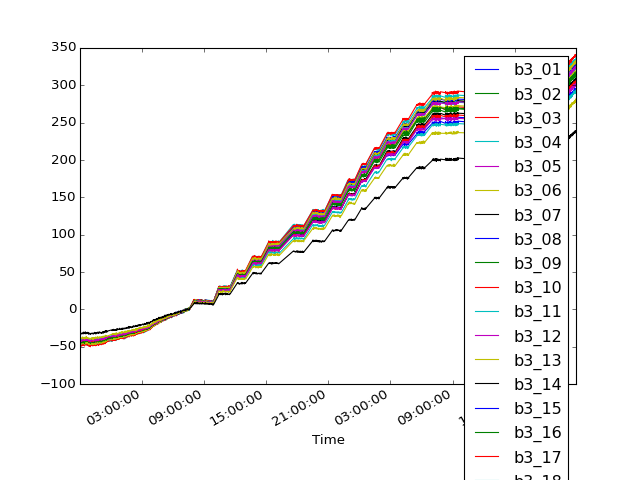

In [11]:
df[tel_B_detectors[-21:]].plot()

In [12]:
from diviner.ground_calib import PolyScaler

In [13]:
b3_detectors = tel_B_detectors[-21:]

In [14]:
b3_detectors.remove('b3_11')

In [15]:
b3_detectors = tel_B_detectors[-21:]
for det in b3_detectors:
    scaler = PolyScaler(df[det], df.b3_11, 3)
    scaler.do_fit()
    df[det+'_fit'] = scaler.scaled

In [16]:
df['b3_11_fit'] = df.b3_11

In [17]:
fitted = [i+'_fit' for i in tel_B_detectors[-21:]]

<IPython.core.display.Javascript object>


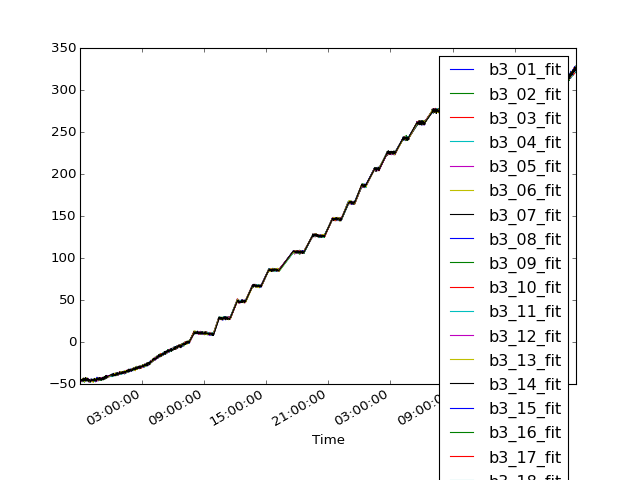

In [18]:
df[fitted].plot()

In [19]:
data = pd.read_hdf('/Users/klay6683/Dropbox/data/diviner/ground_calib/gc_a6_b1_b2_b3.h5', 'df')
data[data < -9998] = np.nan
data.dropna(how='all', inplace=True)

In [20]:
data.head()

,a6_11,b1_11,b2_11,b3_11
2008-01-08 17:15:29.111,22860,27635,27645,27642
2008-01-08 17:15:29.239,22859,27630,27645,27643
2008-01-08 17:15:29.367,22857,27628,27648,27648
2008-01-08 17:15:29.495,22865,27633,27644,27643
2008-01-08 17:15:29.623,22857,27631,27643,27641


In [21]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


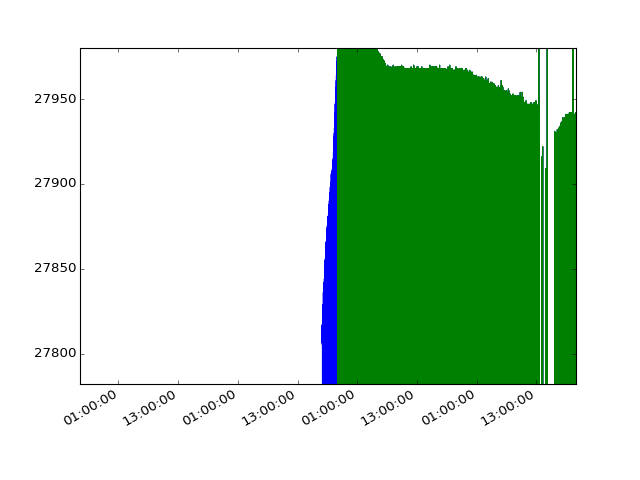

In [22]:
plt.figure()
data[:'20080112 20']['b3_11'].plot()

In [48]:
data[:'20080112 20'].index

<class 'pandas.tseries.index.DatetimeIndex'>
[2008-01-08 17:15:29.111000, ..., 2008-01-12 20:24:35.183000]
Length: 1441728, Freq: None, Timezone: None

In [55]:
df['2008-01-10 21:03'].index.values

array(['2008-01-10T14:03:52.738000000-0700'], dtype='datetime64[ns]')

In [54]:
data['2008-01-10 21:03:52'].index.values

array(['2008-01-10T14:03:52.122000000-0700',
       '2008-01-10T14:03:52.250000000-0700',
       '2008-01-10T14:03:52.378000000-0700',
       '2008-01-10T14:03:52.506000000-0700',
       '2008-01-10T14:03:52.634000000-0700',
       '2008-01-10T14:03:52.762000000-0700',
       '2008-01-10T14:03:52.890000000-0700'], dtype='datetime64[ns]')

In [23]:
t0 = df.index[0]

In [24]:
t1 = df.index[-1]

In [25]:
t0

Timestamp('2008-01-10 21:03:52.738000')

In [26]:
t1

Timestamp('2008-01-12 20:54:27.807000')

In [27]:
tfmt = '%Y%m%d %H:%M'

In [28]:
data_at_df = data[t0.to_datetime().strftime(tfmt):t1.to_datetime().strftime(tfmt)]

In [31]:
from bokeh.plotting import figure, show

In [33]:
p = figure(x_axis_type="datetime")

In [34]:
p.line(data_at_df.index, data_at_df.b3_11, notebook=True)


AttributeError: unexpected attribute 'notebook' to Line, possible attributes are line_alpha, line_cap, line_color, line_dash, line_dash_offset, line_join, line_width, name, session, tags, visible, x or y

In [29]:
data_at_df.b3_11.plot()

In [112]:
t_10K_start = '2008-01-10 21'
t_10K_end = '2008-01-12 20'
# using a conservative cut-off area here to stay with clean measurements
t_10K_end_clean = '20080112 13:30'
t_30K_start = '20080112 23:30'
t_30K_end = '20080113 15:15'
t_60K_start = '20080114 11:00'
t_60K_end = '20080115 02:50'
# set start and end times here:
start = t_10K_start
end = t_10K_end_clean

In [114]:
df.columns

Index([u'Time', u'Fixed BB T', u'Var BB T', u'BB1 T', u'BB2 T', u'FPA T', u'FPB T', u'OBA T', u'a3_01', u'a3_02', u'a3_03', u'a3_04', u'a3_05', u'a3_06', u'a3_07', u'a3_08', u'a3_09', u'a3_10', u'a3_11', u'a3_12', u'a3_13', u'a3_14', u'a3_15', u'a3_16', u'a3_17', u'a3_18', u'a3_19', u'a3_20', u'a3_21', u'a4_01', u'a4_02', u'a4_03', u'a4_04', u'a4_05', u'a4_06', u'a4_07', u'a4_08', u'a4_09', u'a4_10', u'a4_11', u'a4_12', u'a4_13', u'a4_14', u'a4_15', u'a4_16', u'a4_17', u'a4_18', u'a4_19', u'a4_20', u'a4_21', u'a5_01', u'a5_02', u'a5_03', u'a5_04', u'a5_05', u'a5_06', u'a5_07', u'a5_08', u'a5_09', u'a5_10', u'a5_11', u'a5_12', u'a5_13', u'a5_14', u'a5_15', u'a5_16', u'a5_17', u'a5_18', u'a5_19', u'a5_20', u'a5_21', u'a6_01', u'a6_02', u'a6_03', u'a6_04', u'a6_05', u'a6_06', u'a6_07', u'a6_08', u'a6_09', u'a6_10', u'a6_11', u'a6_12', u'a6_13', u'a6_14', u'a6_15', u'a6_16', u'a6_17', u'a6_18', u'a6_19', u'a6_20', u'a6_21', u'b1_01', u'b1_02', u'b1_03', u'b1_04', u'b1_05', u'b1_06', u'b1_0

In [117]:
tcols = [u'Fixed BB T', u'Var BB T', u'BB1 T', u'BB2 T', u'FPA T', u'FPB T', u'OBA T']

In [120]:
fig, ax = plt.subplots()
data[start:end].b3_11.plot(ax=ax)
df[start:end][tcols].plot(ax=ax, secondary_y=True,legend=True)